In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

# merging two csv files
df_delay = pd.concat(
    map(pd.read_csv, ["../BITS PILANI FINAL PROJECT/2007.csv", "../BITS PILANI FINAL PROJECT/2008.csv"]), ignore_index=True)


# See Sample data

df_delay.head()

# column details of the data set for an insight into the data
df_delay.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462943 entries, 0 to 14462942
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

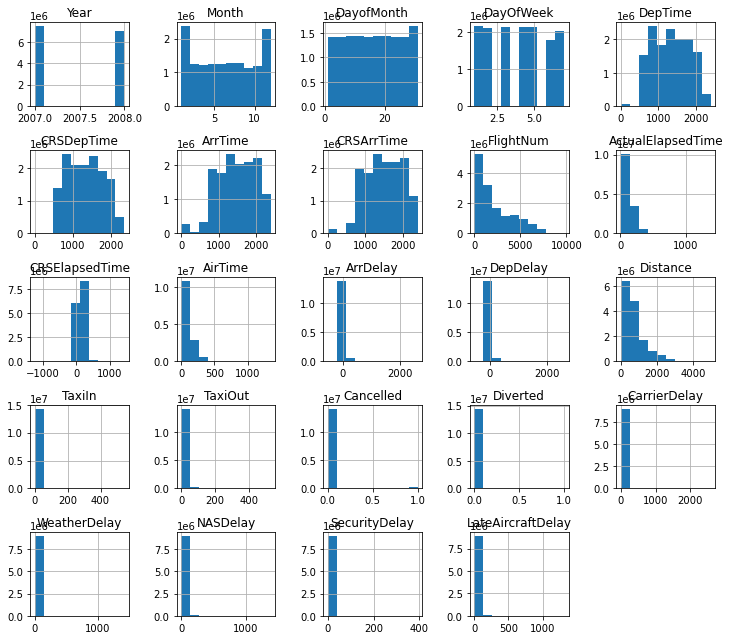

In [2]:
df_delay.hist(figsize=(10,9))
plt.tight_layout()
plt.show()
#df_delay.plot(kind = 'box')

In [3]:
missing_df = df_delay.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df_delay.shape[0]-missing_df['missing values'])/df_delay.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


,variable,missing values,filling factor (%)
0,CancellationCode,14164760,2.061703
1,LateAircraftDelay,5484993,62.075540
2,NASDelay,5484993,62.075540
3,WeatherDelay,5484993,62.075540
4,CarrierDelay,5484993,62.075540
5,SecurityDelay,5484993,62.075540
6,AirTime,332626,97.700150
7,ActualElapsedTime,332626,97.700150
8,ArrDelay,332626,97.700150
9,ArrTime,329576,97.721238


In [4]:
# replacing na values 
df_delay["LateAircraftDelay"].fillna(0, inplace = True)
df_delay["SecurityDelay"].fillna(0, inplace = True)
df_delay["NASDelay"].fillna(0, inplace = True)
df_delay["WeatherDelay"].fillna(0, inplace = True)
df_delay["CarrierDelay"].fillna(0, inplace = True)

In [5]:
#New Depart_Date column created with year, month and day
#check the looping or check how status is updated

df_delay['Depart_Date'] = pd.to_datetime(df_delay.Year*10000+df_delay.Month*100+df_delay.DayofMonth,format='%Y%m%d')

#Status represents if the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df_delay:
    df_delay.loc[df_delay['ArrDelay'] <= 15, 'Status'] = 0
    df_delay.loc[df_delay['ArrDelay'] >= 15, 'Status'] = 1
    df_delay.loc[df_delay['ArrDelay'] >= 60, 'Status'] = 2
    df_delay.loc[df_delay['Diverted'] == 1, 'Status'] = 3
    df_delay.loc[df_delay['Cancelled'] == 1, 'Status'] = 4

#Cancellation Code A-1 B -2 C -3 D -4 
df_delay.loc[df_delay["CancellationCode"] =="A", 'CancellationCode'] = 1
df_delay.loc[df_delay["CancellationCode"] =="B", 'CancellationCode'] = 2
df_delay.loc[df_delay["CancellationCode"] =="C", 'CancellationCode'] = 3
df_delay.loc[df_delay["CancellationCode"] =="D", 'CancellationCode'] = 4

df_delay["CancellationCode"].fillna(0, inplace = True)


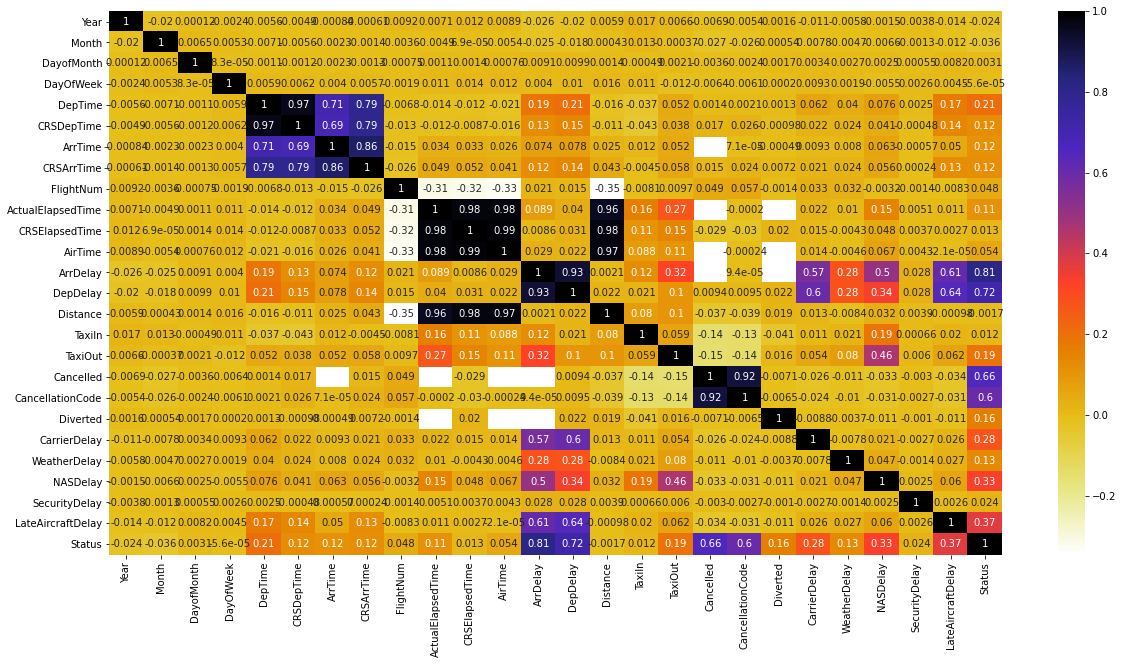

In [6]:
#correlation matrix
corrmat = df_delay.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, cmap=plt.cm.CMRmap_r);
plt.show()

In [7]:
    
variables_to_remove = ['Year','Month','DayofMonth','CRSArrTime','CRSElapsedTime','CRSDepTime','FlightNum','TailNum']
df_delay.drop(variables_to_remove, axis = 1, inplace = True)

# Exploratory Data Analysis

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


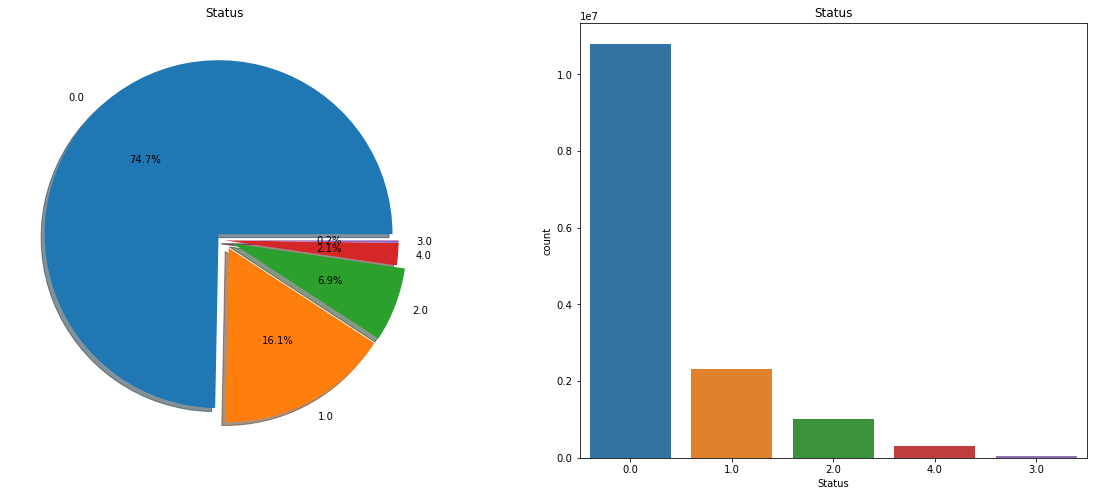

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [8]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_delay['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df_delay['Status'].value_counts().index, data=df_delay,ax=ax[1])
ax[1].set_title('Status')
plt.show()



print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

# Cancelled Flights

In [9]:
df_delay["CancellationCode"].fillna(0, inplace = True)

In [10]:
df_delay["CancellationCode"].head()

0    0
1    0
2    0
3    0
4    0
Name: CancellationCode, dtype: int64

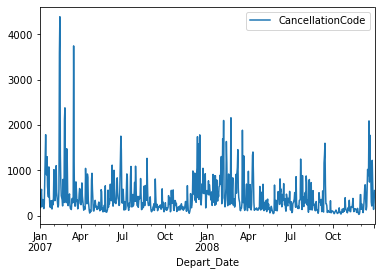

In [11]:
flights=df_delay
CancFlights = flights[(flights.Status == 4)]

#CancFlights = CancFlights[CancFlights['CancellationCode'] !='0']
CancFlights = CancFlights[CancFlights['CancellationCode'] >0]
CancFlights = CancFlights[CancFlights['CancellationCode'] <5]


CancFlights[['Depart_Date','CancellationCode']].groupby(['Depart_Date']).count().plot()
plt.show()



D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


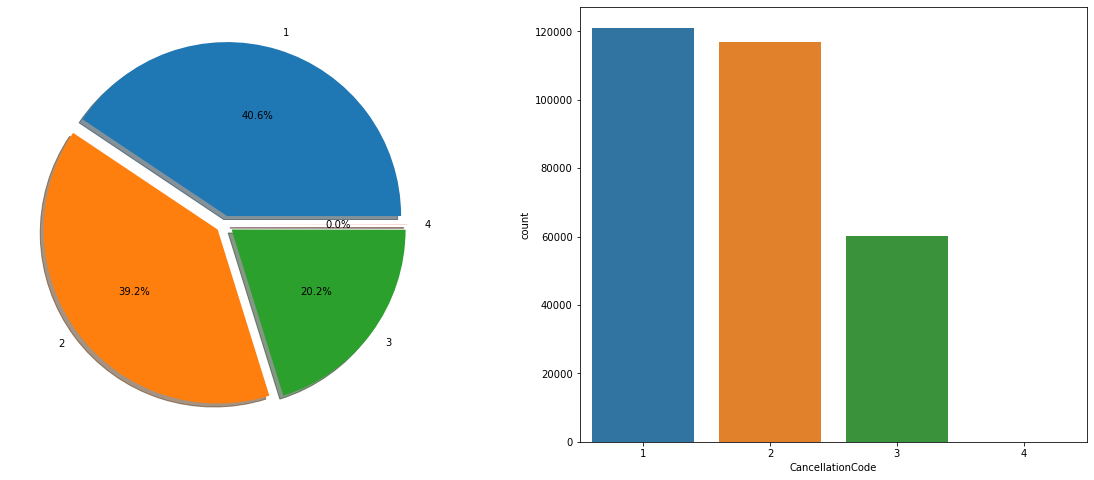

1 = carrier, 2 = weather, 3 = NAS, 4=Security


In [12]:
CancFlights = flights[(flights.Status == 4)]

f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CancellationCode'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CancellationCode', order = CancFlights['CancellationCode'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()


print('1 = carrier, 2 = weather, 3 = NAS, 4=Security')


# Delayed Flights

In [13]:
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]

In [14]:
Delayedflights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328055 entries, 2 to 14462936
Data columns (total 23 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DayOfWeek          int64         
 1   DepTime            float64       
 2   ArrTime            float64       
 3   UniqueCarrier      object        
 4   ActualElapsedTime  float64       
 5   AirTime            float64       
 6   ArrDelay           float64       
 7   DepDelay           float64       
 8   Origin             object        
 9   Dest               object        
 10  Distance           int64         
 11  TaxiIn             float64       
 12  TaxiOut            float64       
 13  Cancelled          int64         
 14  CancellationCode   int64         
 15  Diverted           int64         
 16  CarrierDelay       float64       
 17  WeatherDelay       float64       
 18  NASDelay           float64       
 19  SecurityDelay      float64       
 20  LateAircraftDelay  floa

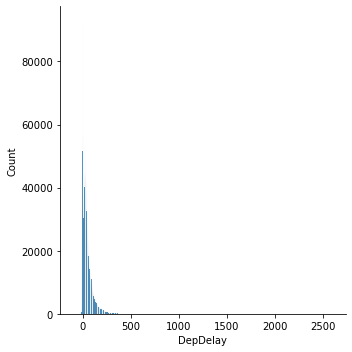

In [15]:
#histogram
sns.displot(Delayedflights['DepDelay'])
plt.show()

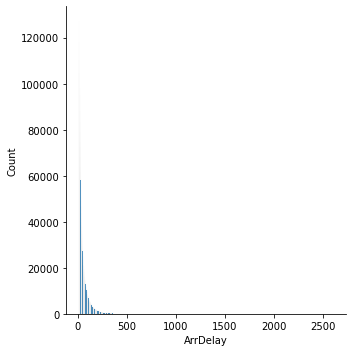

In [16]:
#histogram
sns.displot(Delayedflights['ArrDelay'])
plt.show()

In [17]:
print(flights['UniqueCarrier'].value_counts())

WN    2370625
AA    1238742
OO    1165041
MQ    1031187
UA     939517
US     939036
DL     927820
XE     809283
NW     762178
CO     621606
EV     566809
YV     549292
FL     524843
9E     521059
OH     431394
B6     387541
AS     311287
F9     193522
HA     118001
AQ      54160
Name: UniqueCarrier, dtype: int64


<ipython-input-18-07cfaa26a140>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby('DayOfWeek')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()


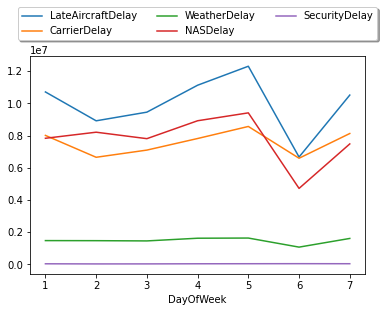

In [18]:
df2 = Delayedflights.filter(['DayOfWeek','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('DayOfWeek')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

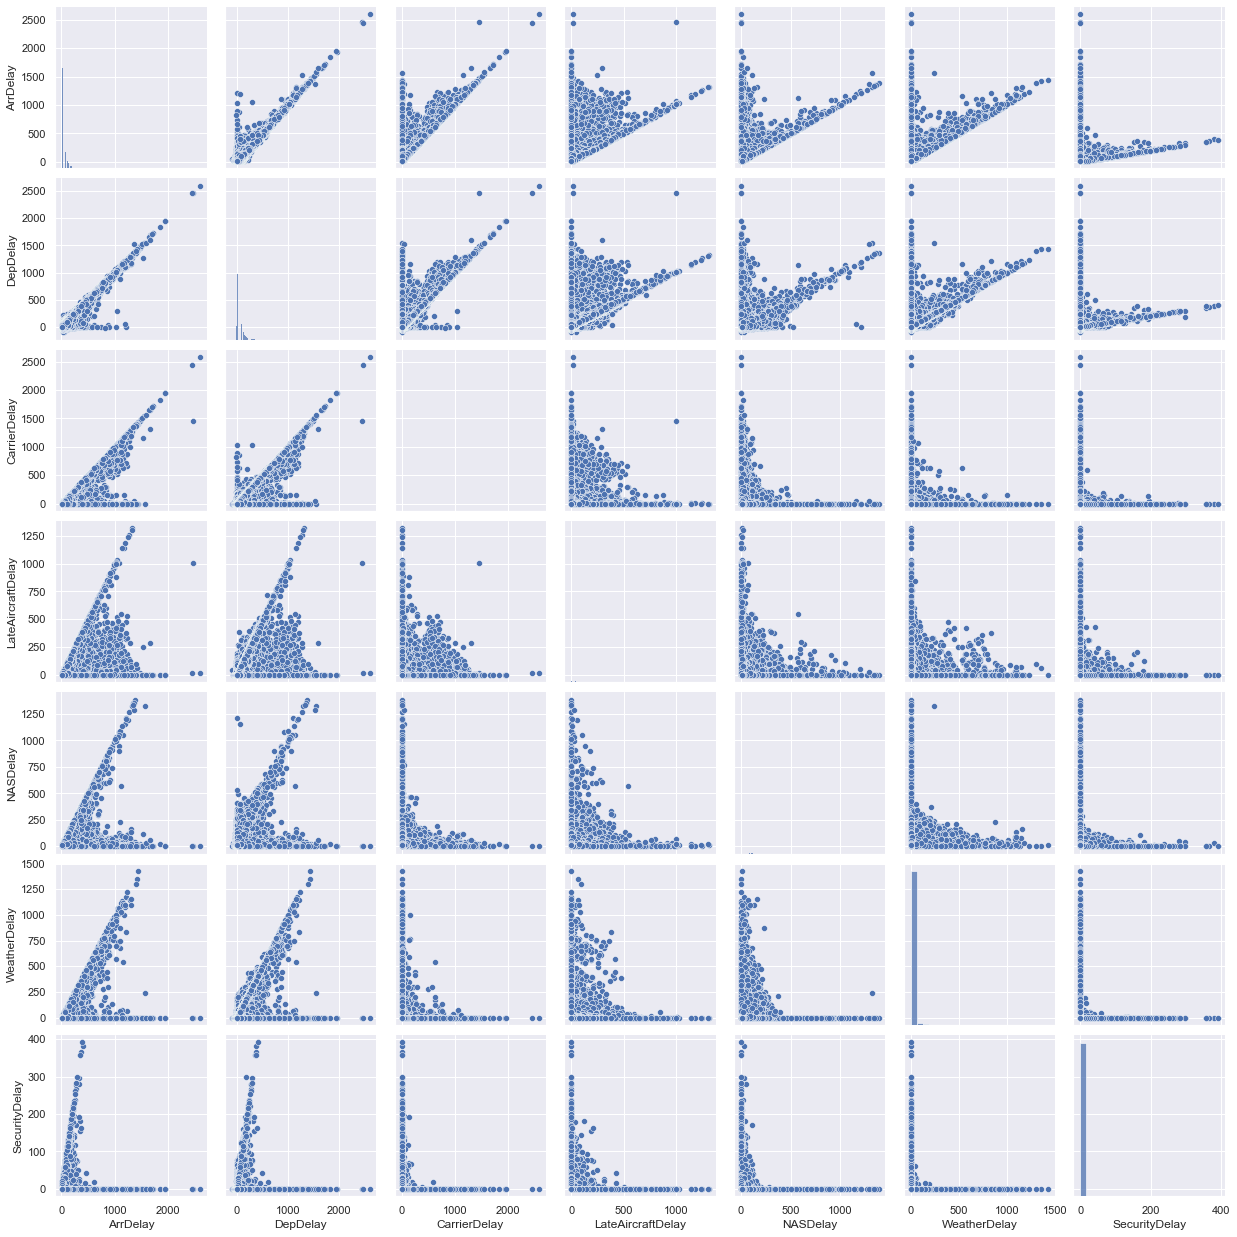

In [19]:
#scatterplot
sns.set()
cols = ['ArrDelay','DepDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay','SecurityDelay']
sns.pairplot(Delayedflights[cols], height = 2.5)
plt.show()

In [20]:
print(Delayedflights['Origin'].value_counts())

ORD    220907
ATL    219298
DFW    154389
DEN    118944
EWR     94155
        ...  
EAU        10
PIR         4
PUB         2
MKC         1
ISO         1
Name: Origin, Length: 311, dtype: int64


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


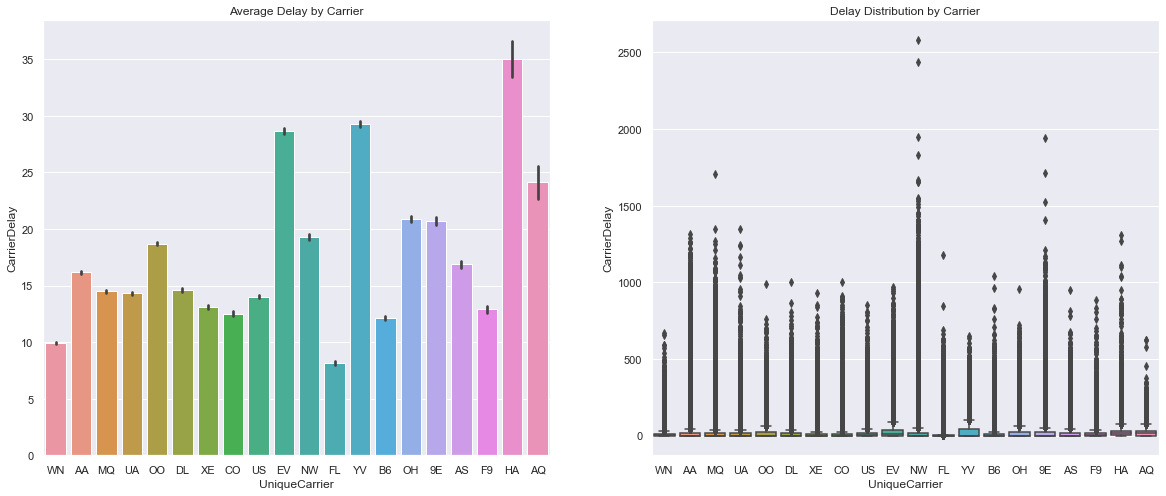

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [21]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


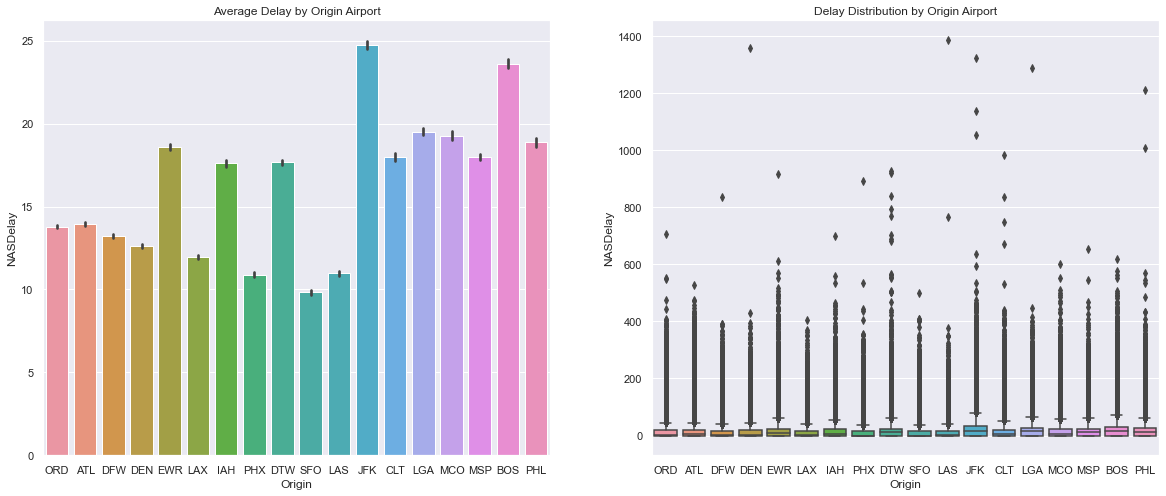

['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver', 'EWR: Newark', 'LAX: Los Ángeles', 'IAH: Houston', 'PHX: Phoenix', 'DTW: Detroit', 'SFO: San Francisco', 'LAS: Las Vegas', 'JFK: New York', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'MCO: Orlando', 'MSP: Minneapolis', 'BOS Boston', 'PHL Philadelphia']


In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Origin','NASDelay', data=Delayedflights,ax=ax[0], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[0].set_title('Average Delay by Origin Airport')
sns.boxplot('Origin','NASDelay', data=Delayedflights,ax=ax[1], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[1].set_title('Delay Distribution by Origin Airport')
plt.close(2)
plt.show()

print(['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver','EWR: Newark','LAX: Los Ángeles',
       'IAH: Houston','PHX: Phoenix','DTW: Detroit','SFO: San Francisco','LAS: Las Vegas','JFK: New York','CLT: Charlotte',
       'LGA: La Guardia (NY)','MCO: Orlando','MSP: Minneapolis','BOS Boston','PHL Philadelphia'])


In [27]:
print (df_delay.head())

   DayOfWeek  DepTime  ArrTime UniqueCarrier  ActualElapsedTime  AirTime  \
0          1   1232.0   1341.0            WN               69.0     54.0   
1          1   1918.0   2043.0            WN               85.0     74.0   
2          1   2206.0   2334.0            WN               88.0     73.0   
3          1   1230.0   1356.0            WN               86.0     75.0   
4          1    831.0    957.0            WN               86.0     74.0   

   ArrDelay  DepDelay Origin Dest  ...  Cancelled  CancellationCode  Diverted  \
0       1.0       7.0    SMF  ONT  ...          0                 0         0   
1       8.0      13.0    SMF  PDX  ...          0                 0         0   
2      34.0      36.0    SMF  PDX  ...          0                 0         0   
3      26.0      30.0    SMF  PDX  ...          0                 0         0   
4      -3.0       1.0    SMF  PDX  ...          0                 0         0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score



In [32]:
data = df_delay.values
print(data)

MemoryError: Unable to allocate 2.48 GiB for an array with shape (23, 14462943) and data type object

In [ ]:
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30
scaled_features = StandardScaler().fit_transform(X_train, X_test)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score